<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16290 entries, 0 to 16289
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           16290 non-null  int64  
 1   Title                16290 non-null  object 
 2   Release Date         16290 non-null  object 
 3   Description          16290 non-null  object 
 4   Rating               12846 non-null  float64
 5   No of Persons Voted  12829 non-null  object 
 6   Directed by          16283 non-null  object 
 7   Written by           15327 non-null  object 
 8   Duration             16277 non-null  object 
 9   Genres               16285 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.2+ MB

Null values in the dataset:
Unnamed: 0                0
Title                     0
Release Date              0
Description               0
Rating                 3444
No of Persons Voted    3461
Directed by               7
Writ

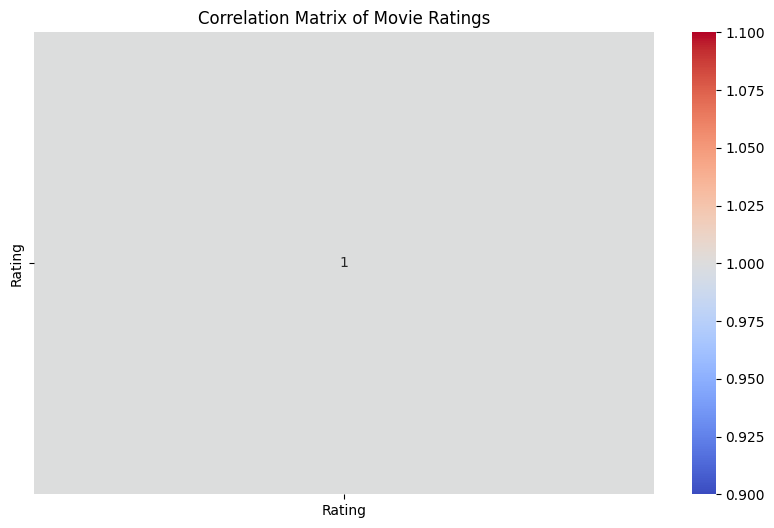

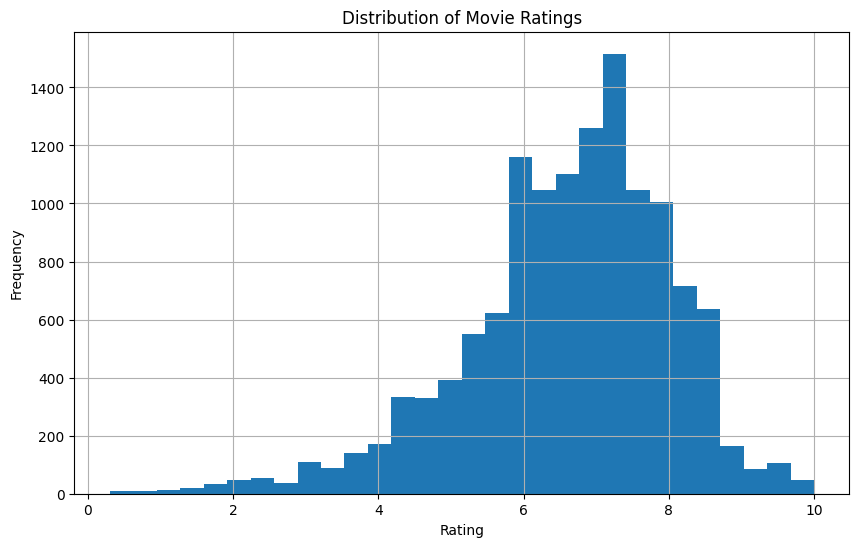


Non-Scaled Training Data:
      No of Persons Voted
7839                 70.0
1669                 27.0
653                 133.0
3703                153.0
4438                  0.0

Scaled Training Data:
   No of Persons Voted
0            -0.028164
1            -0.332018
2             0.417017
3             0.558344
4            -0.522810


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('16k_Movies.csv')

# Display basic information about the dataset
df.info()

# Check for null values in the dataset
print("\nNull values in the dataset:")
print(df.isnull().sum())

# Correlation matrix for numerical columns
corr_matrix = df[['Rating']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix of Movie Ratings')
plt.show()

# Histogram of the Rating column
df['Rating'].hist(bins=30, figsize=(10, 6))
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Define features and target
# Use the 'Rating' as the target for predictive analysis, and select suitable features for prediction.
# In this case, we'll drop non-numeric and irrelevant columns like 'Title', 'Description', etc.
X = df[['No of Persons Voted']].apply(pd.to_numeric, errors='coerce').fillna(0)  # Example feature (Number of Votes)
y = df['Rating']  # Target variable (movie rating)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled features to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Display the first few rows of the non-scaled and scaled training data
print("\nNon-Scaled Training Data:")
print(X_train.head())

print("\nScaled Training Data:")
print(X_train_scaled_df.head())